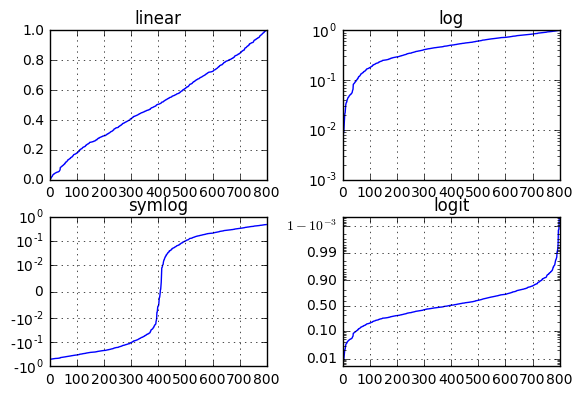

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

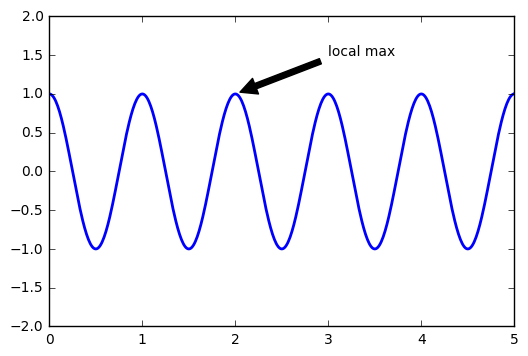

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()


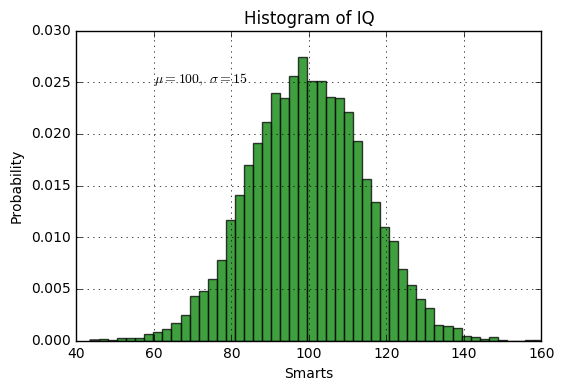

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

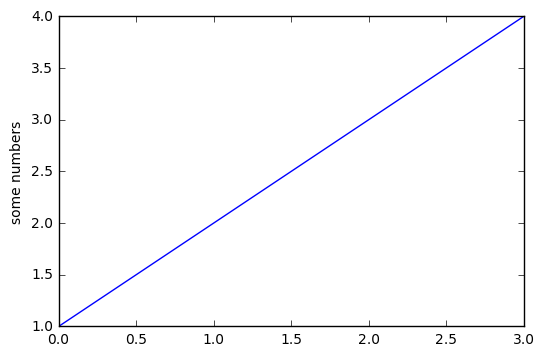

In [4]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [ ]:
import numpy as np
import sys
sys.path.append("../records")
recordpath = '../records/'
import util
'''
株価の確率微分方程式に従うサンプルパスを生成
dS/S = r * dt + vol * dW_t

input
    S0  :
    T   :
    r   :
    vol :
    N   :
    M   :
output

'''

def generate_path(S0, T, r, vol, N, M):
    dt = T/M
    w = np.cumsum(np.reshape(np.random.standard_normal(N*M), (N,M)), 1) * (dt**0.5)
    t = np.cumsum(np.ones((N,M)), 1)*dt
    return S0 * np.exp((r-0.5*vol**2)*t + vol*w)

if __name__ == "__main__":
    #株価・満期・瞬間金利・ボラティリティ
    S0  = 100.0
    T   = 3.0
    R   = 0.01
    VOL = 0.2
    #軌道数・時間刻み数
    N = 200
    M = 200
    num_experiment = 10
    #軌道の生成＆描画
    x = generate_path(S0, T, R, VOL, N, M)
    xlast = x[:,200-1]# Terminal X

    #データを保存するパス名
    filename = 'OU_process_terminal_val_' +  util.print_time() + '.npy'
    filename  = recordpath +filename 
    #plot  も作って適切な保存場所にセーブせよ
    np.save(filename,xlast)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#sys.path.append("../records")
#recordpath = "../records/"
import util

#'''
#ハイパボリックブラウン運動のパスを生成
#dX_t＝Y_t dW_1t
#dY_t = Y_t dW_2t
#ただし W_1 W_2 は独立。
#inputs:
   # N           :ステップ数
    #t_end       :満期
    #y_init      :y の初期値
    #t_init      :t の初期値
    #x_init      :x の初期値

#outputs:
    #x_term      :x の満期時の値
#'''　


def HyperbolicBM(N= 100,  t_end = 10,  y_init = 10, t_init = 0,  q_init = 10):

    #初期値
    ynow = y_init
    xnow = x_init
    tnow = t_init

    #ここでオイラー丸山
    dt = t_end/N

    #BMを生成
    dW1   = lambda dt: np.random.normal (loc = 0.0, scale = np.sqrt(dt))
    dW2   = lambda dt: np.random.normal (loc = 0.0, scale = np.sqrt(dt))

    #HyperbolicBM
b = sig(y[i-1], (i-1) * dt)
y[i] = y[i-1] +y[i-1]*b * dW1(dt)
x[i] = x[i-1] +y[i-1]*b * dW2(dt)

   return x[100]

    #x_term = xnow
    #if __name__=="__main__";

  #軌道数
 　  num_experiment = 100

 #軌道の生成&描画
 　x = generate_path(N= 100,  t_end = 10,  y_init = 10, t_init = 0,  q_init = 10)
    xlast = x[;100-1]#Terminal X



IndentationError: unexpected indent (<ipython-input-10-5a88f8c178d7>, line 44)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



num_sims = 1 #試行回数
num_mc = 100
N        = 1001 #分割回数

y_init = 10 
t_init = 0
q_init = 10
t_end  = 11

#c_theta = 0.9
#c_mu    = 0.1fsum
#c_sig = 0.4

#def mu(y, t): 
    #return c_theta * (c_mu - y)
        
#def sig(y, t): 
    #return c_sig

#np.random.normal = c
#np.random.normal = d
dt   = float(t_end - t_init) / N
dW1   = lambda dt: np.random.normal (loc = 0.0, scale = np.sqrt(dt))
dW2   = lambda dt: np.random.normal (loc = 0.0, scale = np.sqrt(dt))

t    = np.arange(t_init, t_end, dt)
y    = np.zeros(N)
q    = np.zeros(N)
y[0] = y_init
q[0] = q_init

for j in range(num_mc):
   
 #for i in range(num_sims):
    for i in range(1, N):
        #a = mu(y[i-1], (i-1) * dt)
        b = sig(y[i-1], (i-1) * dt)
        y[i] = y[i-1] +y[i-1]*b * dW1(dt)
        q[i] = q[i-1] +y[i-1]*b * dW2(dt)
        
        #print("①",y[i])  #y[i]は満期での値を表している
    #m = y[j]
    def f(j):
        return j/2
    def sigma(func, frm, to):
        result = 0 #答えの受け皿
        for k in range (frm, to+1):
            result += func(k)
            #ここで関数を呼び出す。ちなみにここではk=x
        #df = pd.DataFrame({'C1': [y[1],y[9]],})
        #df
    
    
        #print("各パスの満期での値",q[N-1])
        
        sum = 0
    for x in [q[N-1]]:
        sum = sum + x
        sum 
    #print("合計値/試行回数",sum/num_mc )
    
        #print("結果",result)
    #sigma(f,1,2)
        
        
    plt.plot(t, q)

plt.show()

NameError: name 'c_sig' is not defined

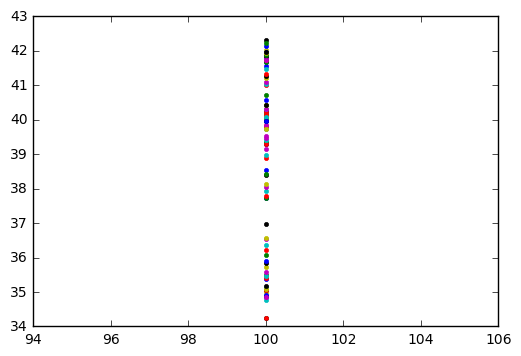

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



num_sims = 1 #試行回数
num_mc = 100
N        = 1001 #分割回数

y_init = 10 
t_init = 0
q_init = 10
t_end  = 11

#c_theta = 0.9
#c_mu    = 0.1fsum
c_sig = 0.4

#def mu(y, t): 
    #return c_theta * (c_mu - y)
        
#def sig(y, t): 
    #return c_sig

dt   = float(t_end - t_init) / N
dW1   = lambda dt: np.random.normal (loc = 0.0, scale = np.sqrt(dt))
dW2   = lambda dt: np.random.normal (loc = 0.0, scale = np.sqrt(dt))

t    = np.arange(t_init, t_end, dt)
y    = np.zeros(N)
q    = np.zeros(N)
y[0] = y_init
q[0] = q_init

for j in range(num_mc):
   
 #for i in range(num_sims):
    for i in range(1, N):
        #a = mu(y[i-1], (i-1) * dt)
        b = sig(y[i-1], (i-1) * dt)
        y[i] = y[i-1] +y[i-1]*b * dW1(dt)
        q[i] = q[i-1] +y[i-1]*b * dW2(dt)
        
        #print("①",y[i])  #y[i]は満期での値を表している
    #m = y[j]
    def f(j):
        return j/2
    def sigma(func, frm, to):
        result = 0 #答えの受け皿
        for k in range (frm, to+1):
            result += func(k)
            #ここで関数を呼び出す。ちなみにここではk=x
        #df = pd.DataFrame({'C1': [y[1],y[9]],})
        #df
    
    
        #print("各パスの満期での値",q[N-1])
        
        sum = 0
    for x in [q[N-1]]:
        sum = sum + x
        sum 
        
        plt.plot(num_mc, sum/num_mc, '.')

plt.show()

In [23]:
plt.plot(num_mc, sum/num_mc, '.')

In [3]:
sum = 0
for x in [1,2,3,4]:
    sum = sum + x
sum

10

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_sims = 1 #試行回数
num_mc = 100
N        = 11 #分割回数

y_init = 10 
t_init = 0
q_init = 10
t_end  = 11

#c_theta = 0.9
#c_mu    = 0.1fsum
c_sig = 0.4

#def mu(y, t): 
    #return c_theta * (c_mu - y)
        
def sig(y, t): 
    return c_sig

dt   = float(t_end - t_init) / N
dW1   = lambda dt: np.random.normal (loc = 0.0, scale = np.sqrt(dt))
dW2   = lambda dt: np.random.normal (loc = 0.0, scale = np.sqrt(dt))

t    = np.arange(t_init, t_end, dt)
y    = np.zeros(N)
q    = np.zeros(N)
y[0] = y_init
q[0] = q_init

for j in range(num_mc):
   
 #for i in range(num_sims):
    for i in range(1, N):
        #a = mu(y[i-1], (i-1) * dt)
        b = sig(y[i-1], (i-1) * dt)
        y[i] = y[i-1] +y[i-1]*b * dW1(dt)
        q[i] = q[i-1] +y[i-1]*b * dW2(dt)
        
        #print("①",y[i])  #y[i]は満期での値を表している
    #m = y[j]
    def f(j):
        return j/2
    def sigma(func, frm, to):
        result = 0 #答えの受け皿
        for k in range (frm, to+1):
            result += func(k)
            #ここで関数を呼び出す。ちなみにここではk=x
        #df = pd.DataFrame({'C1': [y[1],y[9]],})
        #df
    
    
        #print("各パスの満期での値",q[N-1])
        
        sum = 0
    for x in [q[N-1]]:
        sum = sum + x
        sum　
        
    plt.plot(t, q)

plt.show()

SyntaxError: invalid character in identifier (<ipython-input-15-0a79b9c86cbe>, line 61)

In [13]:
print("合計値/試行回数",sum/num_mc )

合計値/試行回数 24.511219157
